In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [76]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow
from tensorflow import keras

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

2024-09-18 13:21:46.458342: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 13:21:46.458517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 13:21:46.618916: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#LOADING TRAINING DATA AND TESTING DATA
df=pd.read_csv("/kaggle/input/human-activity-recognition-using-smartphones/train.csv")
df1=pd.read_csv("/kaggle/input/human-activity-recognition-using-smartphones/test.csv")

In [3]:
df #TRAINING DATA

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [4]:
#STEP-1: DATA ANALYSIS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [6]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
#A DataFrame where each row represents a unique base name from your original column names, 
#along with the count of how many times each base name appears, sorted in descending order.

pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df.columns]), 
                       orient = "index").rename(columns = {0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [8]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [9]:
#STEP-2: EXPLORATORY DATA ANALYSIS
#CHECKING FOR MISSING VALUES
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [10]:
df1.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [11]:
#CHECKING FOR DUPLICATED VALUES
df.duplicated().sum()


0

In [12]:
df1.duplicated().sum()

0

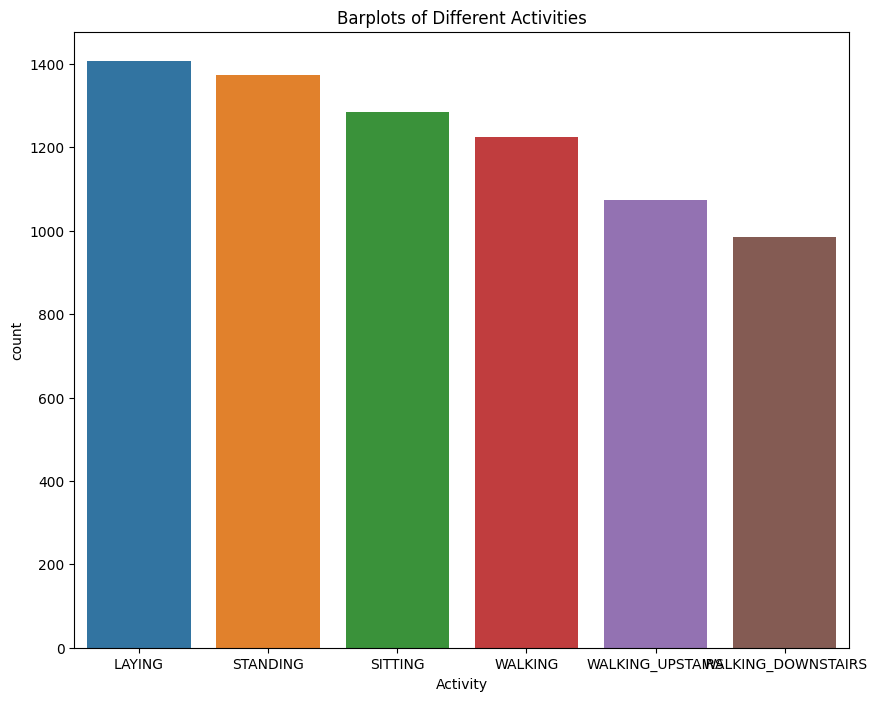

In [13]:
#STEP-3: DATA VISUALISATION
#BAR PLOTS
plt.figure(figsize=(10, 8))
plt.title('Barplots of Different Activities')
sns.countplot(x='Activity', data=df, order=df['Activity'].value_counts().index)
#plt.xticks(rotation=30)
plt.show()

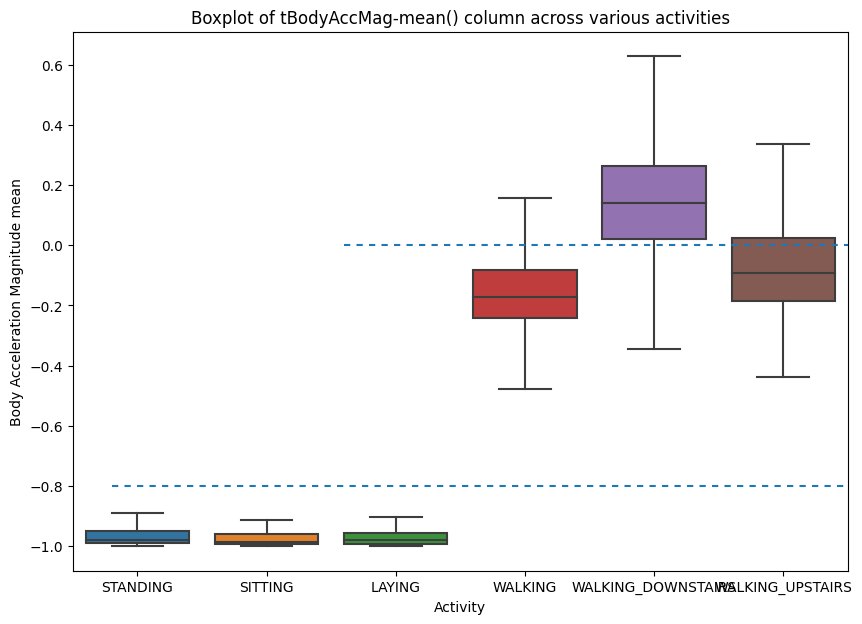

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = df, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.show()

In [ ]:
#if(tBodyAccMag-mean()<=-0.8):
#Activity = "static"
#if(tBodyAccMag-mean()>=-0.6):
#   Activity = "dynamic"

In [15]:
#PCA
#Using PCA data can be visualized from a extremely high dimensional space to a low
#dimensional space and still it retains lots of actual information. Given training
#data has 561 unqiue features, using PCA let's visualize it to a 2D space.
x_for_pca = df1.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)
pca

array([[-2.63288715, -1.34836004],
       [-4.32066522, -1.05337303],
       [-5.0258872 , -0.5125469 ],
       ...,
       [ 5.92507373,  0.78568352],
       [ 6.76131923,  1.41451319],
       [ 6.94801212,  1.61092632]])

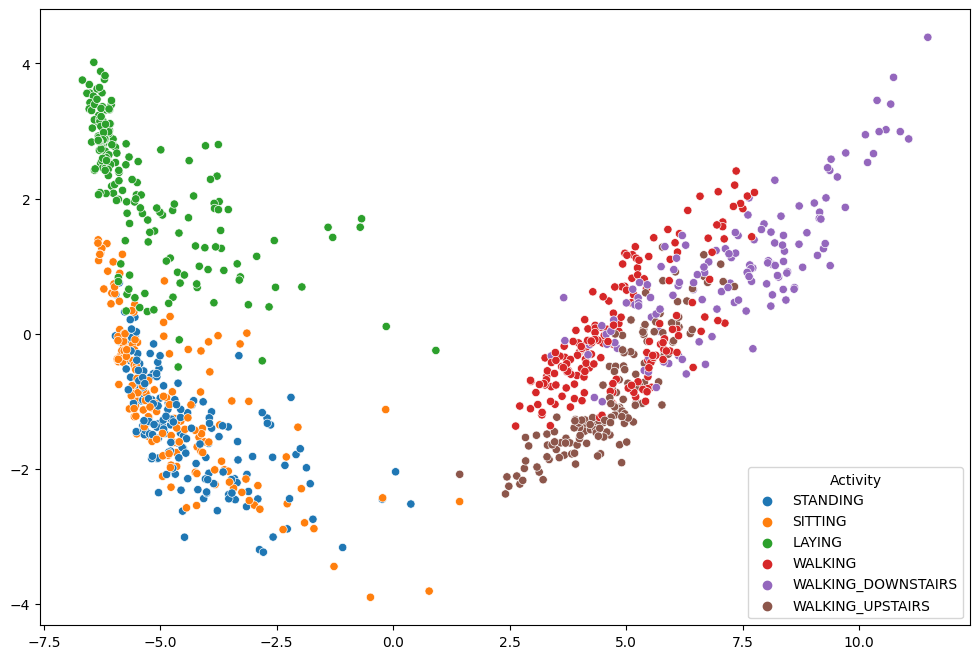

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = df1['Activity'])
plt.show()

In [17]:
#t-SNE
#Using t-SNE data can be visualized from a extremely high dimensional space to a 
#low dimensional space and still it retains lots of actual information. Given training
#data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

x_for_tsne = df.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

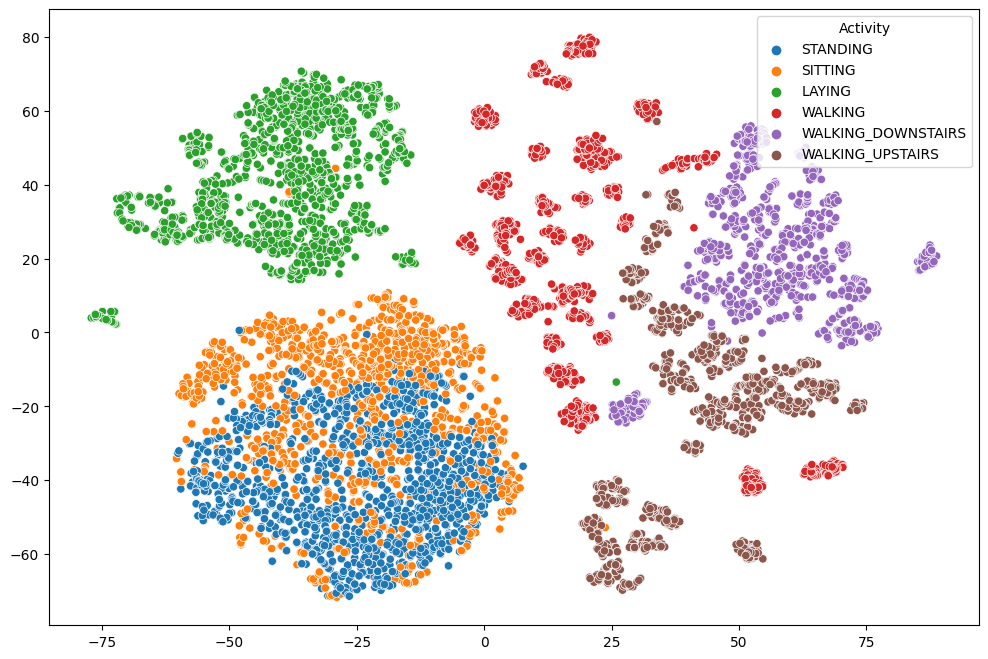

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = df['Activity'])
plt.show()

In [56]:
le=LabelEncoder()
df1["Activity"]=le.fit_transform(df1["Activity"])

In [58]:
x=df1.drop(["subject","Activity"],axis=1)
y=df1["Activity"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [59]:
df1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.347731,-0.032157,-0.098822,-0.156174,0.043034,-0.357678,-0.242008,-0.107938,-0.309664,0.222755,...,-0.570264,-0.782822,0.777496,-0.761512,-0.618794,-0.804792,0.230680,-0.008339,10,3
995,0.220061,-0.015905,-0.126731,-0.198277,-0.032091,-0.446172,-0.279805,-0.150247,-0.399941,0.222755,...,-0.506324,0.717971,0.202447,-0.683921,0.278074,-0.800463,0.234092,-0.006167,10,3
996,0.240172,-0.010125,-0.132276,-0.324234,0.086649,-0.445843,-0.388274,-0.006090,-0.378945,-0.041089,...,-0.728757,0.534596,-0.692795,-0.497539,-0.012647,-0.801466,0.233206,-0.007254,10,3
997,0.326055,0.016412,-0.128606,-0.335340,0.194411,-0.419720,-0.386108,0.060010,-0.372052,-0.184208,...,-0.641198,-0.182979,-0.049838,-0.143235,0.557818,-0.804601,0.230581,-0.009566,10,3


In [60]:
xtrain.shape

(799, 561)

In [61]:
xtest.shape

(200, 561)

In [62]:
ytrain.shape

(799,)

In [63]:
ytrain.unique()

array([2, 3, 0, 5, 1, 4])

In [64]:
#MODEL1:LOGISTIC REGRESSION
LR=LogisticRegression()
LR.fit(xtrain,ytrain)

LogisticRegression()

In [65]:
LR.score(xtrain,ytrain)

1.0

In [40]:
LR.score(xtest,ytest)

0.985

In [66]:
ypred1=LR.predict(xtest)
ypred1

array([4, 1, 3, 4, 0, 3, 2, 5, 3, 3, 3, 4, 5, 3, 3, 3, 1, 0, 0, 4, 3, 1,
       0, 3, 4, 3, 5, 3, 1, 0, 5, 4, 0, 5, 0, 4, 0, 2, 0, 4, 4, 1, 1, 0,
       4, 2, 0, 3, 0, 2, 3, 3, 3, 0, 2, 2, 5, 3, 2, 4, 0, 4, 0, 4, 0, 2,
       2, 3, 0, 1, 0, 1, 5, 3, 0, 1, 2, 4, 2, 1, 3, 3, 3, 3, 0, 0, 1, 1,
       4, 1, 3, 4, 0, 5, 5, 1, 5, 3, 2, 2, 0, 1, 0, 5, 4, 4, 0, 1, 5, 2,
       3, 1, 1, 0, 1, 1, 1, 3, 3, 2, 1, 3, 5, 5, 3, 1, 2, 5, 0, 4, 3, 0,
       0, 2, 0, 5, 0, 4, 3, 2, 3, 0, 2, 5, 4, 3, 1, 4, 0, 2, 1, 4, 1, 5,
       0, 0, 4, 1, 5, 3, 5, 3, 0, 3, 2, 2, 4, 2, 2, 5, 1, 5, 3, 0, 4, 5,
       5, 5, 0, 2, 0, 3, 0, 2, 1, 3, 5, 4, 5, 3, 3, 2, 1, 4, 2, 3, 1, 0,
       1, 5])

In [67]:
cm1=confusion_matrix(ypred1,ytest)
cm1

array([[41,  0,  0,  0,  0,  0],
       [ 0, 29,  3,  0,  0,  0],
       [ 0,  2, 26,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0],
       [ 0,  0,  0,  0, 28,  0],
       [ 0,  1,  0,  0,  0, 27]])

In [68]:
CR1=classification_report(ypred1,ytest,output_dict=True)
CR1=pd.DataFrame(CR1).transpose()
CR1

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,41.00
1,0.906250,0.906250,0.906250,32.00
2,0.896552,0.928571,0.912281,28.00
3,1.000000,1.000000,1.000000,43.00
4,1.000000,1.000000,1.000000,28.00
5,1.000000,0.964286,0.981818,28.00
accuracy,0.970000,0.970000,0.970000,0.97
macro avg,0.967134,0.966518,0.966725,200.00
weighted avg,0.970517,0.970000,0.970174,200.00


In [69]:
#MODEL2: DECISION TREE
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [70]:
DT.score(xtrain,ytrain)

1.0

In [71]:
ypred2=DT.predict(xtest)
ypred2
DT.score(xtest,ytest)

0.97

In [73]:
cm2=confusion_matrix(ypred2,ytest)
cm2

array([[41,  0,  0,  0,  0,  0],
       [ 0, 30,  1,  0,  0,  0],
       [ 0,  2, 28,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0],
       [ 0,  0,  0,  0, 27,  1],
       [ 0,  0,  0,  1,  1, 26]])

In [74]:
CR2=classification_report(ypred2,ytest,output_dict=True)
CR2=pd.DataFrame(CR2).transpose()
CR2

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,41.00
1,0.937500,0.967742,0.952381,31.00
2,0.965517,0.933333,0.949153,30.00
3,0.976744,1.000000,0.988235,42.00
4,0.964286,0.964286,0.964286,28.00
5,0.962963,0.928571,0.945455,28.00
accuracy,0.970000,0.970000,0.970000,0.97
macro avg,0.967835,0.965655,0.966585,200.00
weighted avg,0.970071,0.970000,0.969885,200.00
